<a href="https://colab.research.google.com/github/Suganthan-Thamotharampillai/sales-predictions/blob/main/Project_1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1** - Sales Predictions

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [295]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [296]:
# Load Dataset
filename = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT9TG2tDHfvrpJJ74gEklLfv_IFSYBu8RoRp1T8oGiHUZLHYgq7OFiL52fC6r37xwpF7yP1hy_B_Zl5/pub?gid=878010276&single=true&output=csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Cleaning & Exploring**

In [297]:
#1 How many rows and columns?
df.shape

(8523, 12)

In [298]:
#2 What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [299]:
#3 Are there duplicates? If so, drop any duplicates
df.duplicated().sum()

0

In [300]:
#4 Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [301]:
#5 Decide on how to address the missing values and do it! Explain your choice

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


`According to df.isna().sum() and df.info() from above `**`Item_Weight`**` and `**`Outlet_Size`**` both have missing values`

1. `Outlet_Size and Outlet_Type seems related as one is a type and other is it's size. For Sales Prediction analitics, Outlet_Type is more important than Outlet_Size.`
2. `Since Outlet_Type is all 'non-null' values, and Outlet_Size is of lesser important data type 'object' for sales prediction/calculation, Outlet_Size column is being dropped.`
3. `Since Item_Weight is 82.83% of non-null and numeric data, it is highly valued for sales prediction. Thus, the remaining missing values of 17.17% is being filled with the mean of its greater value 82.83%.`
  
- `On the Basis of, what is good for analytics.. Outlet_Establishment_Year is of irrelevance`
-  `Outlet_Location_Type and Outlet_Identifier may be of the same category but needs further investigation`
- `Since the later three are of all 'non-null' values, they retain their respective places`

In [303]:
# Dropping 'Outlet_Size' Column
df = df.drop(columns = ['Outlet_Size'])

In [304]:
# Filling in 'Item_Weight' with its mean value
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [305]:
#6 Confirm that there are no missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [306]:
#7 Find and fix any inconsistent categories of data (example: fix 'cat, Cat, and cats' so that they are consistent)
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

`Column 'Item_Fat_Content' is identified as inconsistant`

In [307]:
# Before
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [308]:
# After
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'] , ['Low Fat', 'Low Fat', 'Regular'])
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [309]:
#8 For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.describe().loc[['min','max','mean']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914


# **Visualizations**

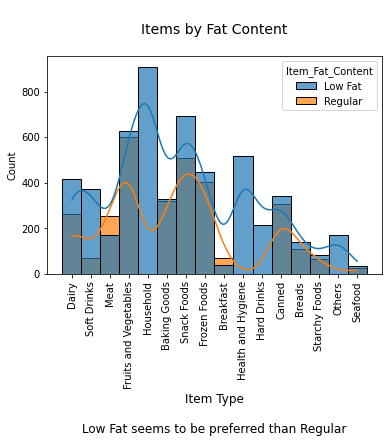

In [310]:
# Histogram
sns.histplot(data = df, x = 'Item_Type', hue = 'Item_Fat_Content', alpha=.7, kde=True).set_title('asfasdf')
plt.title('\nItems by Fat Content\n', fontsize=14)
plt.xlabel('Item Type\n\nLow Fat seems to be preferred than Regular', fontsize=12)
plt.xticks(rotation = 90);

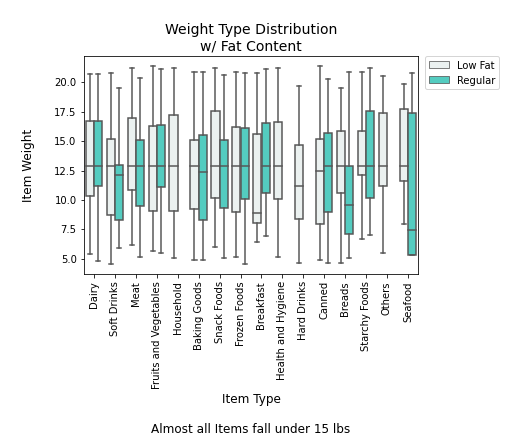

In [311]:
# Boxplot
sns.boxplot(data = df, x = 'Item_Type', y = 'Item_Weight', hue = 'Item_Fat_Content', color = 'turquoise')
plt.title('\nWeight Type Distribution\nw/ Fat Content', fontsize=14)
plt.ylabel('\nItem Weight\n', fontsize=12)
plt.xlabel('Item Type\n\nAlmost all Items fall under 15 lbs', fontsize=12)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

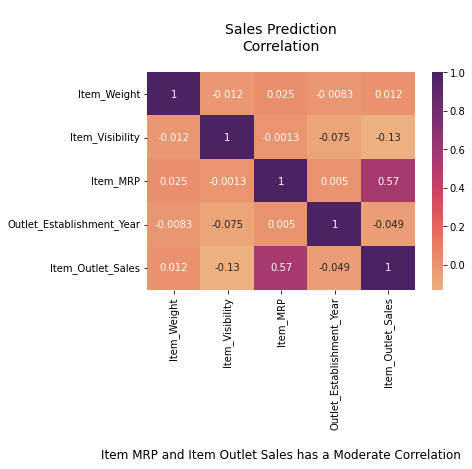

In [312]:
# Heatmap
sns.heatmap(df.corr(), cmap = 'flare', annot = True).set_title("\nSales Prediction\nCorrelation\n", fontsize = 14)
plt.xlabel('\nItem MRP and Item Outlet Sales has a Moderate Correlation', fontsize=12);